In [30]:
import jqdatasdk
# 登录聚宽账号
from jqdatasdk import *
# auth('ID','Password') #ID是申请时所填写的手机号；Password为聚宽官网登录密码
auth('18826575756', 'Zyh20010612')

auth success 


In [13]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False #减号unicode编码
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import math
from pyecharts import options as opts
from pyecharts.charts import TreeMap

In [3]:
def get_ori_data(code):         #根据单个代码获取收益率
    ori_data = get_price(code, start_date='2020-01-01', end_date='2020-12-01', frequency='daily', fields=None, skip_paused=False, fq='pre', panel=True)
    ori_data.drop(['open','high','low','volume','money'],axis=1,inplace=True)
    ori_data.columns = [code]
    return ori_data

In [5]:
def get_ori_name(code): # 获得股票名字
    ori_data = get_security_info(code)
    ori_data_list = ori_data.index.tolist()
    return ori_data_list

In [7]:
def inertia(dataset,min_,max_):# 绘制学习曲线,inertia越小说明簇分的越好
    data = dataset
    min_clusters = min_
    max_clusters = max_
    distortions = []
    for i in range(min_clusters, max_clusters+1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=20,
                    max_iter=300,
                    random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)

    # 绘图
    plt.figure(figsize=(14,6))
    plt.plot(range(min_clusters, max_clusters+1), distortions, marker='o')
    plt.xlabel("簇数", fontsize=18)
    plt.ylabel("inertia", fontsize=16)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [124]:
def silhouette(dataset,min_,max_): #绘制轮廓曲线图
    data = dataset
    wcss = []
    for k in range(min_, max_):
        k_means = KMeans(n_clusters=k)
        k_means.fit(data)
        wcss.append(silhouette_score(data, k_means.labels_))
    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(min_, max_), wcss, marker = 'o')
    plt.grid(True)
    plt.xticks(fontsize=15)
    plt.xlabel("Number of clusters", fontsize=18)
    plt.ylabel('Silhouette_score', fontsize=15)
    plt.title('Silhouette_score curve', fontsize=18)
    plt.show()

In [25]:
def data_get(stocks): #获得能直接进行聚类的数据
    stock = stocks
    init = pd.DataFrame()
    name = []
    for i in stock:
        cf = get_ori_data(i)
        init = pd.concat([init,cf],axis = 1)
        name.append(get_security_info(i).display_name)
    init_drop = init.dropna(axis = 1)
    code = init_drop.columns.tolist()
    init_new = init
    init_new.columns = name
    init_new = init_new.dropna(axis = 1)
    name = init_new.columns.tolist()
    init_last = init_new.pct_change()
    final = init_last.dropna(axis = 0)
    final_last = final.T
    return(final_last,name,code)

In [84]:
def lei(i,dataset,code,name): #存储聚类后的结果
    n_clusters = i
    data = dataset
    code_ = [[] for x in range(i)]
    name_ = [[] for x in range(i)]
    kmeans = KMeans(n_clusters)
    kmeans.fit(data)
    code = code
    name = name
    labels = pd.Series(kmeans.labels_)
    for j in range(i):
        res = labels[labels.values == j]
        for k in res.index:
            code_[j].append(code[k])
            name_[j].append(name[k])
    return(code_,name_)

In [110]:
def lei_zm(name): #展示聚类后的结果
    name_ = name
    n_clusters = len(name_)
    for i in range(n_clusters):
        print('Cluster %i: %s' % ((i+1),','.join(name_[i])))

In [26]:
# 获得中证800的成分股
stocks = get_index_stocks('000906.XSHG')
stocks[0:5]

['000001.XSHE', '000002.XSHE', '000009.XSHE', '000012.XSHE', '000021.XSHE']

In [31]:
data,name,code = data_get(stocks)

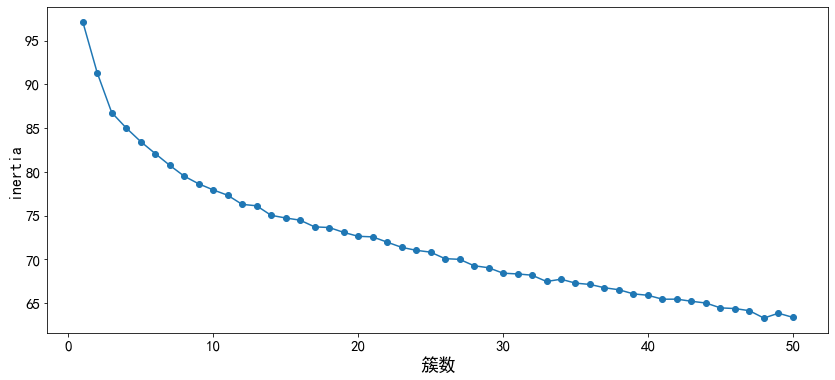

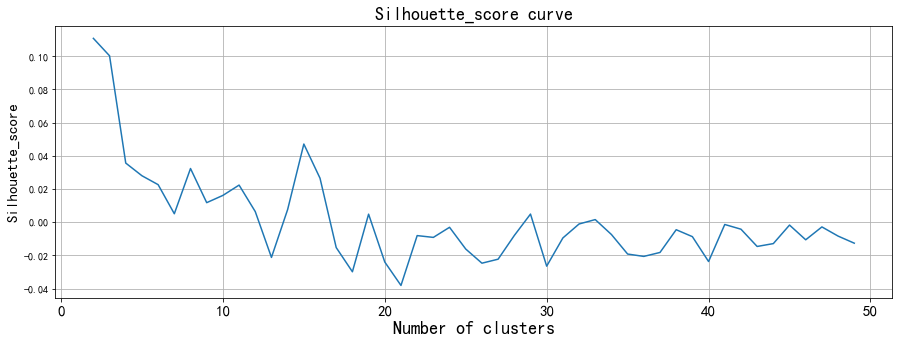

In [37]:
inertia(data,1,50)
silhouette(data,2,50)

In [85]:
code_1,name_1 = lei(3,data,code,name)

In [111]:
lei_zm(name_1)

Cluster 1: 国药一致,美的集团,丽珠集团,云南白药,泸州老窖,古井贡酒,长春高新,燕京啤酒,普洛药业,五粮液,张裕A,新希望,双汇发展,中粮科技,华东医药,华润三九,招商积余,新和成,华兰生物,亿帆医药,达安基因,苏泊尔,双鹭药业,美年健康,韵达股份,南极电商,东华能源,鱼跃医疗,九阳股份,联化科技,上海莱士,东方雨虹,信立泰,圣农发展,海大集团,顺丰控股,亚厦股份,蓝帆医疗,大北农,信邦制药,海普瑞,广联达,高德红外,科伦药业,贵州百灵,巨星科技,晶澳科技,涪陵榨菜,中顺洁柔,三七互娱,洽洽食品,百润股份,索菲亚,以岭药业,中公教育,完美世界,海思科,美亚光电,新宝股份,牧原股份,坚朗五金,凯莱英,裕同科技,视源股份,大博医疗,新乳业,乐普医疗,安科生物,爱尔眼科,红日药业,智飞生物,汇川技术,沃森生物,汤臣倍健,万达信息,迪安诊断,泰格医药,我武生物,博腾股份,芒果超媒,昆仑万维,迈克生物,万孚生物,健帆生物,贝达药业,欧普康视,康泰生物,亿联网络,普利制药,华大基因,英科医疗,康龙化成,迈瑞医疗,中国医药,华润双鹤,人福医药,同仁堂,重庆啤酒,金发科技,天坛生物,中牧股份,复星医药,生物股份,浙江医药,恒瑞医药,安琪酵母,上海家化,中新药业,白云山,健康元,片仔癀,扬农化工,国药股份,贵州茅台,华海药业,山东药玻,天士力,天下秀,济川药业,康恩贝,光明乳业,青岛啤酒,辽宁成大,通策医疗,山西汾酒,王府井,通化东宝,中炬高新,伊利股份,赤峰黄金,九州通,隆基股份,恒立液压,上海医药,际华集团,星宇股份,中国中免,永辉超市,昭衍新药,迎驾贡酒,大参林,药明康德,海天味业,天味食品,浙江鼎力,莱克电气,今世缘,吉比特,九洲药业,绝味食品,伟明环保,口子窖,珀莱雅,艾迪精密,安图生物,健友股份,家家悦,科博达,福斯特,欧派家居,步长制药,桃李面包,飞科电器,金域医学,老百姓,晨光文具,益丰药房,丸美股份,南微医学,微芯生物,华熙生物
Cluster 2: 中国宝安,深科技,深天马A,深圳华强,中兴通讯,中国长城,TCL科技,华数传媒,常山北明,航天发展,风华高科,京东方A,振华科技,紫光股份,浪潮信息,华工科技,新大陆,大族激光,思源电气,宁波华翔,紫光国微,三花智控,横店东磁,东华软件,中环股份,利欧股份,顺络电子,广电运通,石基信息,通富微电,游族网络,

# Cluster1进行分析

In [88]:
code_1_ = code_1[0]

In [89]:
data_clu1,name_clu1,code_clu1 = data_get(code_1_)

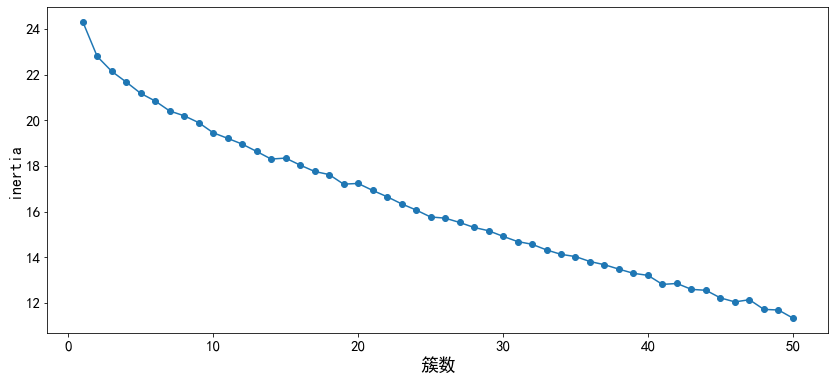

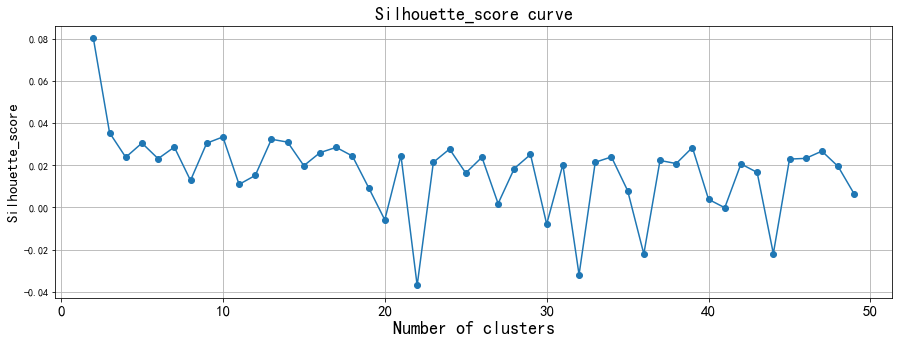

In [91]:
inertia(data_clu1,1,50)
silhouette(data_clu1,2,50)

In [115]:
code_1_2,name_1_2 = lei(3,data_clu1,code_clu1,name_clu1)

In [116]:
lei_zm(name_1_2)

Cluster 1: 达安基因,鱼跃医疗,蓝帆医疗,以岭药业,红日药业,迈克生物,华大基因,英科医疗
Cluster 2: 美的集团,泸州老窖,古井贡酒,长春高新,燕京啤酒,五粮液,张裕A,新希望,双汇发展,招商积余,苏泊尔,南极电商,九阳股份,联化科技,东方雨虹,圣农发展,海大集团,亚厦股份,涪陵榨菜,中顺洁柔,洽洽食品,百润股份,索菲亚,中公教育,美亚光电,新宝股份,牧原股份,坚朗五金,凯莱英,大博医疗,新乳业,爱尔眼科,汇川技术,万达信息,泰格医药,我武生物,健帆生物,贝达药业,欧普康视,康龙化成,重庆啤酒,恒瑞医药,安琪酵母,上海家化,扬农化工,贵州茅台,光明乳业,青岛啤酒,通策医疗,山西汾酒,中炬高新,伊利股份,恒立液压,星宇股份,中国中免,昭衍新药,迎驾贡酒,大参林,药明康德,海天味业,天味食品,浙江鼎力,莱克电气,今世缘,绝味食品,伟明环保,口子窖,珀莱雅,艾迪精密,健友股份,科博达,欧派家居,桃李面包,飞科电器,老百姓,晨光文具,益丰药房,丸美股份,华熙生物
Cluster 3: 国药一致,丽珠集团,云南白药,普洛药业,中粮科技,华东医药,华润三九,新和成,华兰生物,亿帆医药,双鹭药业,美年健康,韵达股份,东华能源,上海莱士,信立泰,顺丰控股,大北农,信邦制药,海普瑞,广联达,高德红外,科伦药业,贵州百灵,巨星科技,晶澳科技,三七互娱,完美世界,海思科,裕同科技,视源股份,乐普医疗,安科生物,智飞生物,沃森生物,汤臣倍健,迪安诊断,博腾股份,芒果超媒,昆仑万维,万孚生物,康泰生物,亿联网络,普利制药,迈瑞医疗,中国医药,华润双鹤,人福医药,同仁堂,金发科技,天坛生物,中牧股份,复星医药,生物股份,浙江医药,中新药业,白云山,健康元,片仔癀,国药股份,华海药业,山东药玻,天士力,天下秀,济川药业,康恩贝,辽宁成大,王府井,通化东宝,赤峰黄金,九州通,隆基股份,上海医药,际华集团,永辉超市,吉比特,九洲药业,安图生物,家家悦,福斯特,步长制药,金域医学,南微医学,微芯生物


In [119]:
code_1_2_ = code_1_2[1]

In [120]:
data_clu1_clu2,name_clu1_clu2,code_clu1_clu2 = data_get(code_1_2_)

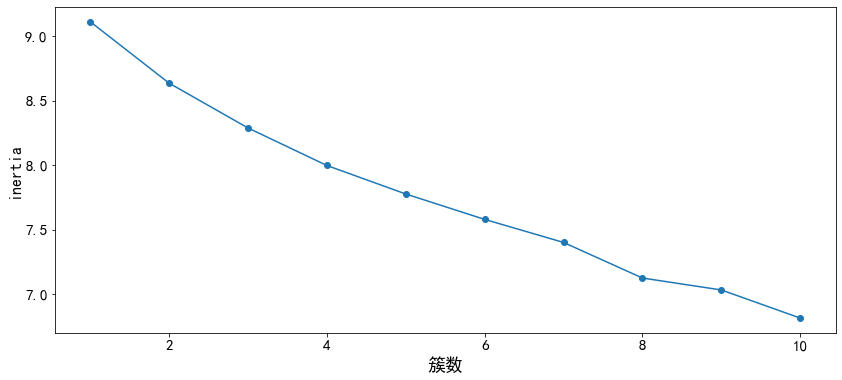

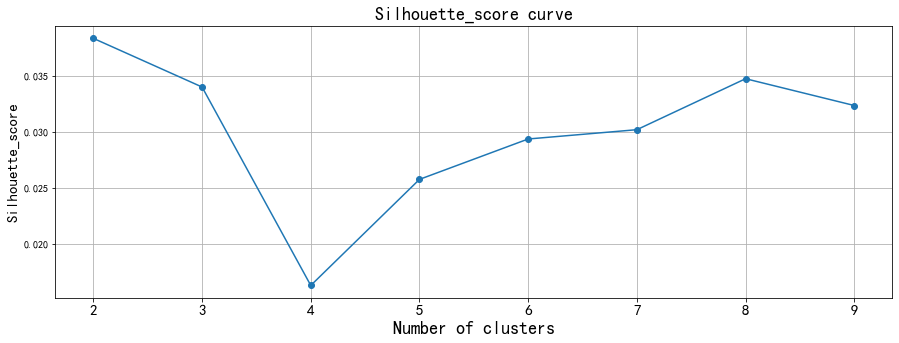

In [125]:
inertia(data_clu1_clu2,1,10)
silhouette(data_clu1_clu2,2,10)

In [144]:
code_1_2_all,name_1_2_all = lei(4,data_clu1_clu2,code_clu1_clu2,name_clu1_clu2)

In [145]:
lei_zm(name_1_2_all)

Cluster 1: 长春高新,美亚光电,坚朗五金,凯莱英,大博医疗,爱尔眼科,泰格医药,我武生物,健帆生物,贝达药业,欧普康视,康龙化成,上海家化,通策医疗,昭衍新药,大参林,药明康德,珀莱雅,艾迪精密,健友股份,华熙生物
Cluster 2: 燕京啤酒,双汇发展,海大集团,亚厦股份,涪陵榨菜,中顺洁柔,洽洽食品,百润股份,新宝股份,牧原股份,万达信息,重庆啤酒,恒瑞医药,安琪酵母,青岛啤酒,中炬高新,伊利股份,中国中免,海天味业,天味食品,浙江鼎力,绝味食品,桃李面包,老百姓,晨光文具,益丰药房
Cluster 3: 美的集团,新希望,南极电商,九阳股份,联化科技,东方雨虹,圣农发展,索菲亚,中公教育,新乳业,汇川技术,扬农化工,光明乳业,恒立液压,星宇股份,莱克电气,伟明环保,科博达,欧派家居,飞科电器,丸美股份
Cluster 4: 泸州老窖,古井贡酒,五粮液,张裕A,招商积余,苏泊尔,贵州茅台,山西汾酒,迎驾贡酒,今世缘,口子窖


In [146]:
code_1_2__ = code_1_2[2]

In [147]:
data_clu1_clu3,name_clu1_clu3,code_clu1_clu3 = data_get(code_1_2__)

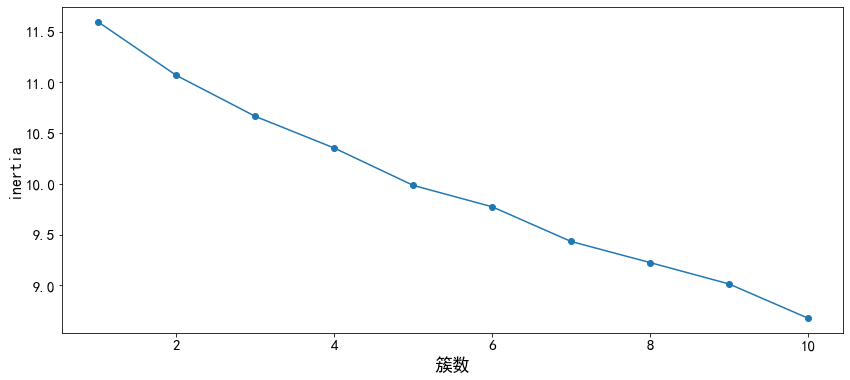

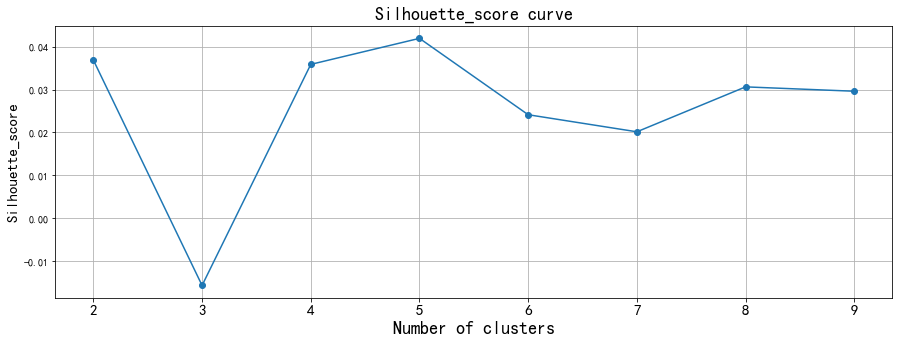

In [148]:
inertia(data_clu1_clu3,1,10)
silhouette(data_clu1_clu3,2,10)

In [174]:
code_1_3_all,name_1_3_all = lei(5,data_clu1_clu3,code_clu1_clu3,name_clu1_clu3)

In [175]:
lei_zm(name_1_3_all)

Cluster 1: 美年健康,大北农,广联达,晶澳科技,三七互娱,完美世界,芒果超媒,昆仑万维,金发科技,中牧股份,生物股份,赤峰黄金,隆基股份,吉比特,家家悦,福斯特
Cluster 2: 中粮科技,华润三九,双鹭药业,东华能源,上海莱士,信邦制药,高德红外,科伦药业,贵州百灵,亿联网络,中国医药,华润双鹤,同仁堂,白云山,天士力,康恩贝,上海医药,际华集团
Cluster 3: 华兰生物,安科生物,智飞生物,沃森生物,迪安诊断,万孚生物,康泰生物,迈瑞医疗,天坛生物,复星医药,华海药业,山东药玻,九洲药业,安图生物,金域医学
Cluster 4: 国药一致,丽珠集团,云南白药,普洛药业,华东医药,新和成,亿帆医药,韵达股份,信立泰,顺丰控股,海普瑞,巨星科技,海思科,裕同科技,视源股份,乐普医疗,汤臣倍健,普利制药,人福医药,浙江医药,中新药业,健康元,片仔癀,国药股份,天下秀,济川药业,辽宁成大,王府井,通化东宝,九州通,永辉超市,步长制药,南微医学,微芯生物
Cluster 5: 博腾股份


# 对Cluster2进行分析

In [176]:
code_2_ = code_1[1]

In [177]:
data_clu2,name_clu2,code_clu2 = data_get(code_2_)

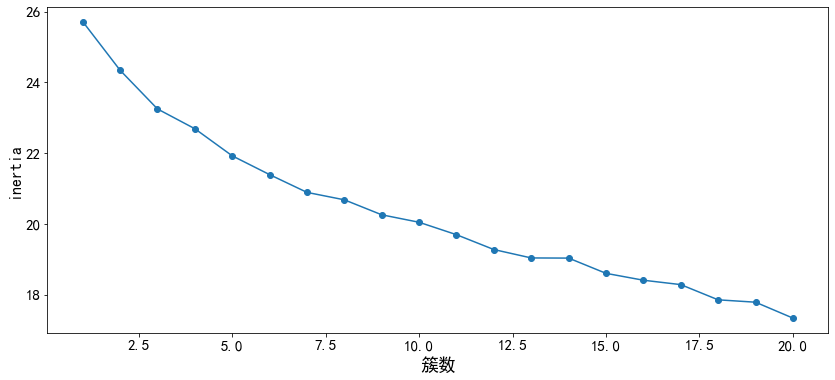

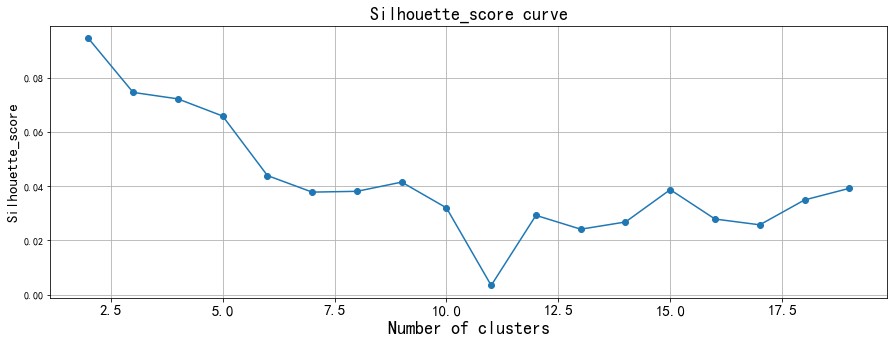

In [178]:
inertia(data_clu2,1,20)
silhouette(data_clu2,2,20)

In [197]:
code_2_2,name_2_2 = lei(11,data_clu2,code_clu2,name_clu2)

In [198]:
lei_zm(name_2_2)

Cluster 1: 歌尔股份,东山精密,立讯精密,领益智造,鹏鼎控股,信维通信,蓝思科技,环旭电子
Cluster 2: 通富微电,华天科技,北京君正,卓胜微,闻泰科技,汇顶科技,韦尔股份,兆易创新
Cluster 3: 中兴通讯,常山北明,利欧股份,光迅科技,星网锐捷,爱施德,崇达技术,深南电路,中际旭创,光环新网,杭钢股份,生益科技,亨通光电,烽火通信,中天科技,佳都科技,长飞光纤,国联股份
Cluster 4: 深科技,中国长城,航天发展,振华科技,紫光股份,紫光国微,横店东磁,中环股份,千方科技,海格通信,宏大爆破,同花顺,东方财富,易华录,晶盛机电,景嘉微,中国卫星,巨化股份,上海贝岭,中国软件,太极实业,航天电子,红塔证券,三六零,中国卫通,中科曙光,鸿远电子,中科软,睿创微纳,晶晨股份
Cluster 5: 阳光电源,锦浪科技,通威股份,爱旭股份,福莱特
Cluster 6: 深天马A,深圳华强,TCL科技,风华高科,京东方A,华工科技,大族激光,思源电气,顺络电子,石基信息,纳思达,大华股份,水晶光电,兆驰股份,木林森,盈趣科技,网宿科技,蓝色光标,长信科技,长盈精密,捷成股份,国瓷材料,利亚德,三环集团,山煤国际,彩虹股份,四川长虹,工业富联,景旺电子,彤程新材,柏楚电子
Cluster 7: 赣锋锂业,天齐锂业,寒锐钴业,杉杉股份,华友钴业,容百科技,杭可科技
Cluster 8: 易事特
Cluster 9: 中国宝安,宁波华翔,三花智控,比亚迪,天赐材料,恩捷股份,特锐德,亿纬锂能,新宙邦,先导智能,捷佳伟创,宁德时代,迈为股份,法拉电子,卧龙电驱,均胜电子,宏发股份,拓普集团,科沃斯,璞泰来
Cluster 10: 华数传媒,浪潮信息,新大陆,东华软件,广电运通,游族网络,天融信,科大讯飞,卫士通,格林美,太极股份,启明星辰,世纪华通,华策影视,东方国信,卫宁健康,华宇软件,掌趣科技,光威复材,恒生电子,用友网络,东软集团,宝信软件,人民网,七一二,传音控股,金山办公
Cluster 11: 北方华创,雅克科技,长电科技,澜起科技,中微公司,虹软科技


# 对Cluster3进行分析

In [199]:
code_3_ = code_1[2]

In [200]:
data_clu3,name_clu3,code_clu3 = data_get(code_3_)

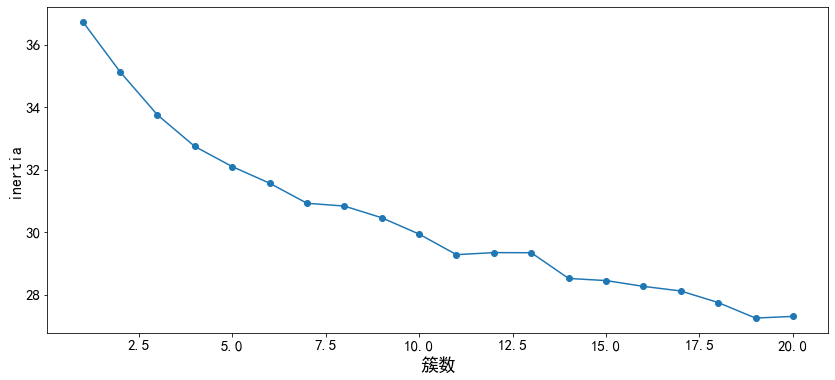

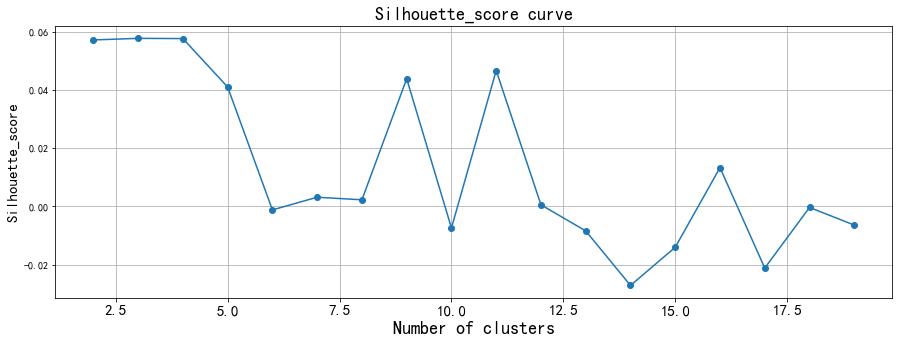

In [201]:
inertia(data_clu3,1,20)
silhouette(data_clu3,2,20)

In [202]:
code_3_2,name_3_2 = lei(7,data_clu3,code_clu3,name_clu3)

In [203]:
lei_zm(name_3_2)

Cluster 1: 深圳能源,中集集团,泛海控股,深圳机场,东方盛虹,渤海租赁,晨鸣纸业,安道麦A,兴蓉环境,吉林敖东,格力电器,中山公用,宝新能源,恒逸石化,中信特钢,河钢股份,苏宁环球,新兴铸管,太钢不锈,湖北能源,鞍钢股份,华菱钢铁,首钢股份,招商港口,招商公路,鸿达兴业,华邦健康,传化智联,苏宁易购,万丰奥威,中泰化学,二三四五,海亮股份,洋河股份,伟星新材,齐翔腾达,中粮资本,闰土股份,申通快递,荣盛石化,协鑫集成,森马服饰,豪迈科技,奥瑞金,万达电影,中国广核,碧水源,宋城演艺,光线传媒,开山股份,温氏股份,首创环保,上海机场,包钢股份,华能国际,上港集团,宝钢股份,上海电力,山东钢铁,华能水电,中远海能,华电国际,中国石化,南方航空,歌华有线,四川路桥,中国联通,南京高科,中国东航,浙江东方,国网信通,建发股份,永泰能源,中体产业,联美控股,上海建工,雅戈尔,新湖中宝,圆通速递,桂冠电力,广汇能源,首旅酒店,城建发展,航天信息,南钢股份,安迪苏,酒钢宏兴,中油工程,山东高速,中文传媒,宁沪高速,海澜之家,抚顺特钢,国电南瑞,中化国际,方大特钢,山鹰国际,天地科技,华谊集团,东方明珠,浦东金桥,申能股份,外高桥,城投控股,豫园股份,陆家嘴,东阳光,海尔智家,物产中大,天津港,重庆百货,锦江酒店,厦门国贸,新钢股份,中储股份,国电电力,马钢股份,隧道股份,上海机电,上海临港,内蒙华电,石化油服,国投电力,张江高科,长江电力,贵州燃气,重庆燃气,江苏有线,海油发展,宝丰能源,唐山港,柳钢股份,重庆钢铁,大秦铁路,节能风电,春秋航空,中南传媒,中国一重,中国国航,深圳燃气,中国西电,上海环境,广州港,青岛港,广深铁路,中国外运,中信重工,中国核建,中国中车,美凯龙,中国石油,中远海发,招商轮船,辽港股份,中煤能源,中远海控,凤凰传媒,招商南油,中国核电,大唐发电,和邦生物,养元饮品,新凤鸣,合盛硅业,三美股份,欧普照明,吉祥航空,中国通号
Cluster 2: 申万宏源,中天金融,陕国投A,东北证券,国元证券,国海证券,广发证券,长江证券,越秀金控,山西证券,国盛金控,西部证券,国信证券,第一创业,华西证券,长城证券,华林证券,中信证券,国投资本,湘财股份,国金证券,华创阳安,西南证券,五矿资本,金证股份,国网英大,爱建集团,中航产融,百联股份,海通证券,华

## Cluster3中的Cluster1

In [204]:
code_3_2_ = code_3_2[0]

In [205]:
data_clu3_clu1,name_clu3_clu1,code_clu3_clu1 = data_get(code_3_2_)

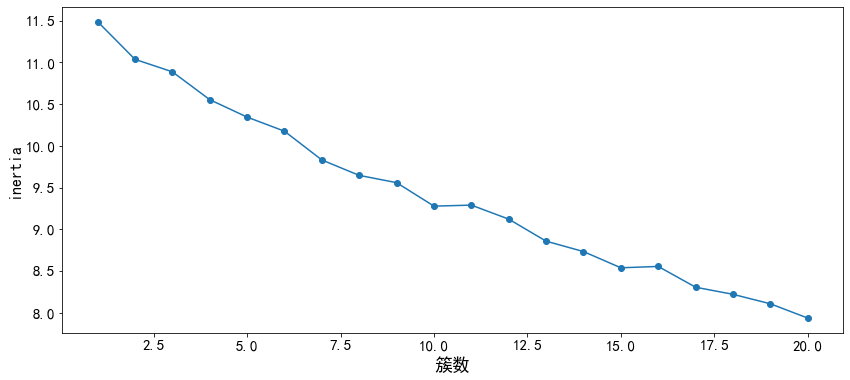

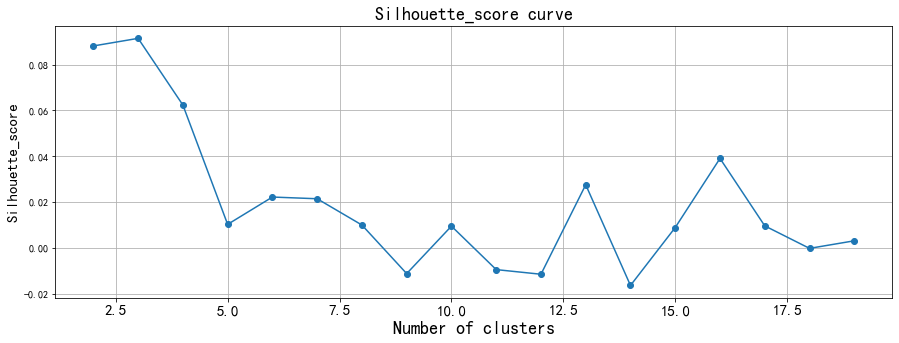

In [206]:
inertia(data_clu3_clu1,1,20)
silhouette(data_clu3_clu1,2,20)

In [382]:
code_3_2__,name_3_2__ = lei(10,data_clu3_clu1,code_clu3_clu1,name_clu3_clu1)

In [383]:
lei_zm(name_3_2__)

Cluster 1: 深圳机场,中粮资本,光线传媒,开山股份,南京高科,浙江东方,浦东金桥,外高桥,城投控股,陆家嘴,厦门国贸,中储股份,上海临港,张江高科,美凯龙
Cluster 2: 东方盛虹,安道麦A,格力电器,恒逸石化,首钢股份,传化智联,苏宁易购,洋河股份,伟星新材,荣盛石化,豪迈科技,中国石化,联美控股,桂冠电力,广汇能源,中油工程,山东高速,宁沪高速,抚顺特钢,豫园股份,海尔智家,物产中大,天津港,石化油服,长江电力,贵州燃气,重庆燃气,海油发展,宝丰能源,大秦铁路,中国石油,辽港股份,养元饮品,新凤鸣,欧普照明
Cluster 3: 协鑫集成
Cluster 4: 国网信通
Cluster 5: 万达电影,上海机场,南方航空,中国东航,首旅酒店,锦江酒店,春秋航空,中国国航,吉祥航空
Cluster 6: 深圳能源,晨鸣纸业,兴蓉环境,吉林敖东,中山公用,宝新能源,中信特钢,河钢股份,苏宁环球,新兴铸管,太钢不锈,湖北能源,鞍钢股份,华菱钢铁,招商公路,鸿达兴业,华邦健康,万丰奥威,中泰化学,二三四五,海亮股份,闰土股份,申通快递,奥瑞金,中国广核,碧水源,温氏股份,首创环保,包钢股份,华能国际,宝钢股份,上海电力,山东钢铁,华能水电,华电国际,四川路桥,中国联通,建发股份,永泰能源,上海建工,雅戈尔,圆通速递,城建发展,航天信息,南钢股份,酒钢宏兴,中文传媒,海澜之家,国电南瑞,中化国际,山鹰国际,天地科技,华谊集团,东方明珠,申能股份,东阳光,重庆百货,新钢股份,国电电力,马钢股份,隧道股份,上海机电,内蒙华电,国投电力,江苏有线,唐山港,柳钢股份,重庆钢铁,节能风电,中南传媒,中国一重,深圳燃气,中国西电,上海环境,广深铁路,中信重工,中国核建,中国中车,中煤能源,凤凰传媒,中国核电,大唐发电,和邦生物,中国通号
Cluster 7: 中远海能,招商轮船,招商南油
Cluster 8: 中体产业
Cluster 9: 宋城演艺
Cluster 10: 中集集团,泛海控股,渤海租赁,招商港口,齐翔腾达,森马服饰,上港集团,歌华有线,新湖中宝,安迪苏,方大特钢,广州港,青岛港,中国外运,中远海发,中远海控,合盛硅业,三美股份


## Cluster3中的Cluster4

In [384]:
code_3_2_4 = code_3_2[3]

In [385]:
data_clu3_clu4,name_clu3_clu4,code_clu3_clu4 = data_get(code_3_2_4)

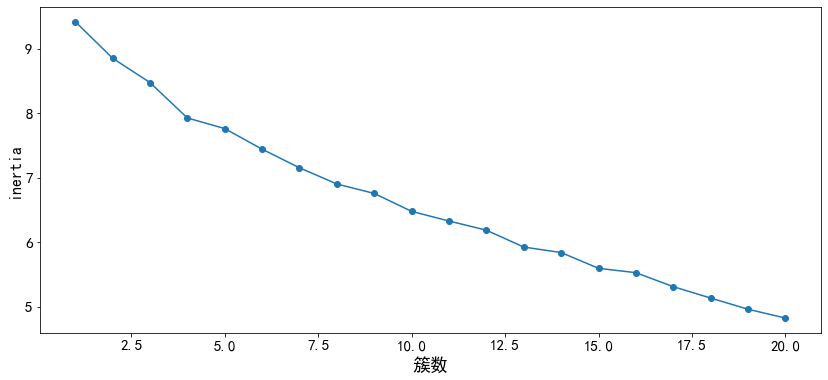

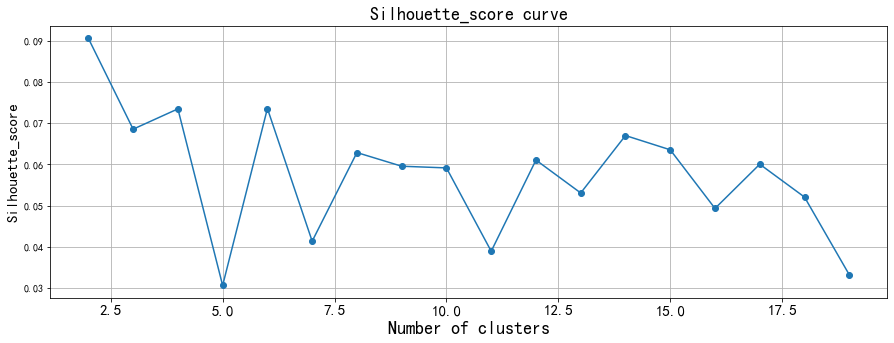

In [387]:
inertia(data_clu3_clu4,1,20)
silhouette(data_clu3_clu4,2,20)

In [420]:
code_3_2__4,name_3_2__4 = lei(5,data_clu3_clu4,code_clu3_clu4,name_clu3_clu4)

In [421]:
lei_zm(name_3_2__4)

Cluster 1: 银泰黄金,湖南黄金,中金黄金,山东黄金
Cluster 2: 南玻A,鲁西化工,盈峰环境,中材科技,金风科技,杰瑞股份,杭氧股份,天山铝业,兴发集团,万华化学,三友化工,华鲁恒升,新奥股份,旗滨集团,中海油服,正泰电器,玲珑轮胎,德邦股份
Cluster 3: 许继电气,万向钱潮,威孚高科,中鼎股份,诚志股份,分众传媒,华峰化学,沙钢股份,中航光电,怡亚通,大洋电机,浙富控股,维信诺,海康威视,周大生,机器人,三聚环保,海信视像,小商品城,东方通信,东方电气,君正集团,明阳智能,日月股份
Cluster 4: 隆平高科,天邦股份,正邦科技,益生股份,鹏都农牧,北大荒,中粮糖业,东方集团,海南橡胶
Cluster 5: 长安汽车,一汽解放,万里扬,东风汽车,宇通客车,上汽集团,福田汽车,广汇汽车,江淮汽车,福耀玻璃,北汽蓝谷,华域汽车,广汽集团,长城汽车,郑煤机


## 下面进行优化，在上面每个小聚类中进行定义并选择出1-2支个人觉得具有代表性的股票进行半监督聚类

In [443]:
hangye = ['生物医药','医疗医药','食品','饮料','家具电器','白酒','游戏','中药','制药','航空','能源','电力','传媒','运输','基建','旅游',
          '证券','有色金属','贵金属','化工','电气设备','种植','汽车','银行','航天军工','航空军工','地产','芯片','半导体','通讯','电子',
          '光伏设备','锂电池','能源金属']

In [445]:
name_choose = ['达安基因','华大基因','泰格医药','贝达药业','海天味业','桃李面包','伊利股份','光明乳业','美的集团','飞科电器','泸州老窖',
               '五粮液','完美世界','三七互娱','同仁堂','贵州百灵','普利制药','南方航空','春秋航空','广汇能源','长江电力','国电电力',
               '凤凰传媒','中南传媒','青岛港','中国外运','中信重工','锦江酒店','首旅酒店','长江证券','光大证券','中金岭南','攀钢钒钛',
               '湖南黄金','山东黄金','鲁西化工','万华化学','许继电气','东方电气','鹏都农牧','北大荒','长安汽车','广汽集团','平安银行',
               '华夏银行','中航西飞','中航沈飞','中兵红箭','洪都航空','万科A','华侨城A','东山精密','华天科技','中兴通讯','烽火通信',
               '大族激光','顺络电子','阳光电源','亿纬锂能','宁德时代','华友钴业']

In [446]:
name_choose_lei = ['生物医药','生物医药','医疗医药','医疗医药','食品','食品','饮料','饮料','家具电器','家具电器','白酒',
               '白酒','游戏','游戏','中药','中药','制药','航空','航空','能源','电力','电力',
               '传媒','传媒','运输','运输','基建','旅游','旅游','证券','证券','有色金属','有色金属',
               '贵金属','贵金属','化工','化工','电气设备','电气设备','种植','种植','汽车','汽车','银行',
               '银行','航天军工','航天军工','航空军工','航空军工','地产','地产','芯片','半导体','通讯','通讯',
               '电子','电子','光伏设备','锂电池','锂电池','能源金属']

In [447]:
code_choose = []
for i in name_choose:
    a = name.index(i)
    code_choose.append(code[a])

In [448]:
data_choose,name_choose,code_choose = data_get(code_choose)

In [455]:
data_not_choose = data.drop(index = name_choose)

In [462]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
enc = enc.fit(hangye)
label = enc.transform(name_choose_lei)

In [463]:
label

array([14, 14,  5,  5, 32, 32, 33, 33,  9,  9, 18, 18, 13, 13,  0,  0,  3,
       23, 23, 20, 15, 15,  1,  1, 28, 28,  8, 10, 10, 26, 26, 11, 11, 27,
       27,  4,  4, 17, 17, 19, 19, 12, 12, 30, 30, 22, 22, 24, 24,  7,  7,
       25,  6, 29, 29, 16, 16,  2, 31, 31, 21])

In [464]:
data_choose['label'] = label

### 手写半监督 (逻辑链参考西瓜书第307-309页)

In [477]:
def dist(A,B):
    """
    计算两个向量之间的欧氏距离
    """
    return np.sqrt(sum(np.power(A - B, 2)))

def center_(datasetA):
    """
    根据datasetA来确定聚类中心
    """
    center = []
    label_list = np.unique(datasetA[:,-1])
    for i in label_list:
        datasetA_i = datasetA[(datasetA[:,-1]) == i]
        center_i = np.mean(datasetA_i,0)
        center.append(center_i[:-1])
    return np.array(center)

def semi_kmeans(datasetA,datasetB,dist_ = dist,init_center = center_):
    dataset = np.vstack((datasetA[:,:-1],datasetB))
    label_list = np.unique(datasetA[:,-1])
    k = len(label_list)
    m = np.shape(dataset)[0]
    
    cluster = np.zeros(m)
    center = init_center(datasetA)
    cluster_change = True
    while cluster_change:
        cluster_change = False
        for i in range(m):
            mindist = np.inf; minindex = -1
            for j in range(k):
                distji = dist_(center[j,:],dataset[i,:])
                if distji < mindist:
                    mindist = distji; minindex = j
            if cluster[i] != minindex:
                cluster_change = True
            cluster[i] = minindex
        for l in range(k):
            clusterset = dataset[np.nonzero(cluster == l)[0]]
            center[l,:] = np.mean(clusterset, axis = 0)
            
    return cluster

In [483]:
data_choose_ay = np.asarray(data_choose)
data_not_choose_ay = np.asarray(data_not_choose)

In [484]:
semi_kmeans_result = semi_kmeans(data_choose_ay,data_not_choose_ay)

In [494]:
data_total = pd.concat([data_choose,data_not_choose],axis = 0)
data_total['label'] = semi_kmeans_result

In [507]:
label_list = data_total['label'].tolist()
result = enc.inverse_transform(list(map(int,label_list)))

In [509]:
data_total['行业'] = result

In [512]:
code_final = []
name_final = data_total.index.tolist()
for i in name_final:
    a = name.index(i)
    code_final.append(code[a])

In [519]:
data_total_baoliu = data_total[['label','行业']]
data_total_baoliu['code'] = code_final
data_total_baoliu = data_total_baoliu.drop(labels = 'label', axis = 1)

In [526]:
path = r'C:\\Users\\DELL\\Desktop\\行业定义1.xlsx'
data_total_baoliu.to_excel(path)